<a href="https://colab.research.google.com/github/AKBER-HUSSAIN/ML_Lab_Practice/blob/main/GradientDecent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: Cost=0.2755, w=0.0054, b=0.0071
Epoch 100: Cost=0.0215, w=0.2895, b=0.3663
Epoch 200: Cost=0.0088, w=0.3650, b=0.4360
Epoch 300: Cost=0.0078, w=0.3942, b=0.4423
Epoch 400: Cost=0.0074, w=0.4129, b=0.4348
Epoch 500: Cost=0.0070, w=0.4290, b=0.4246
Epoch 600: Cost=0.0067, w=0.4442, b=0.4140
Epoch 700: Cost=0.0064, w=0.4589, b=0.4034
Epoch 800: Cost=0.0061, w=0.4732, b=0.3932
Epoch 900: Cost=0.0058, w=0.4872, b=0.3832
Epoch 0: Cost=0.2755, w=0.0540, b=0.0714
Epoch 100: Cost=0.0055, w=0.5021, b=0.3724
Epoch 200: Cost=0.0033, w=0.6200, b=0.2877
Epoch 300: Cost=0.0021, w=0.7109, b=0.2224
Epoch 400: Cost=0.0013, w=0.7810, b=0.1720
Epoch 500: Cost=0.0009, w=0.8350, b=0.1332
Epoch 600: Cost=0.0006, w=0.8767, b=0.1032
Epoch 700: Cost=0.0005, w=0.9089, b=0.0801
Epoch 800: Cost=0.0004, w=0.9337, b=0.0623
Epoch 900: Cost=0.0003, w=0.9528, b=0.0485
Epoch 0: Cost=0.2755, w=0.2698, b=0.3571
Epoch 100: Cost=0.0009, w=0.8382, b=0.1309
Epoch 200: Cost=0.0003, w=0.9687, b=0.0371
Epoch 300: Cost=0

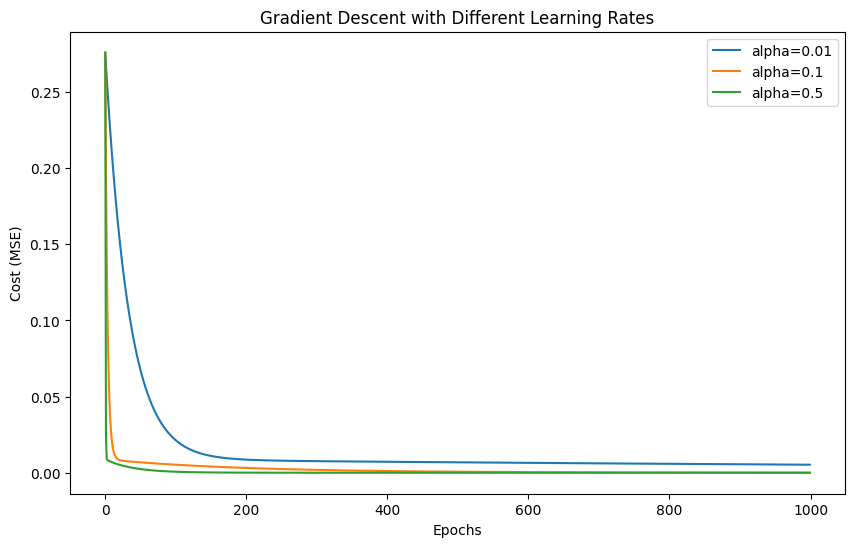

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# STEP 1: Create Dataset
# -------------------------
# Let's assume house size (X) vs price (Y)
X = np.array([800, 1000, 1200, 1500, 1800], dtype=float)  # size in sq.ft
Y = np.array([150000, 200000, 250000, 300000, 350000], dtype=float)  # price

m = len(X)  # number of training examples

# Normalize X (optional, but helps gradient descent)
X = X / max(X)
Y = Y / max(Y)

# -------------------------
# STEP 2: Initialize parameters
# -------------------------
w = 0
b = 0

# -------------------------
# STEP 3: Define gradient descent
# -------------------------
def gradient_descent(X, Y, w, b, alpha, epochs):
    m = len(X)
    cost_history = []

    for i in range(epochs):
        # Predictions
        y_pred = w * X + b

        # Gradients
        dw = (1/m) * np.dot((y_pred - Y), X)
        db = (1/m) * np.sum(y_pred - Y)

        # Update parameters
        w -= alpha * dw
        b -= alpha * db

        # Compute cost (MSE)
        cost = (1/(2*m)) * np.sum((y_pred - Y)**2)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Epoch {i}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")

    return w, b, cost_history

# -------------------------
# STEP 4: Run with different learning rates
# -------------------------
learning_rates = [0.01, 0.1, 0.5]
epochs = 1000

plt.figure(figsize=(10,6))

for alpha in learning_rates:
    w, b, cost_history = gradient_descent(X, Y, w=0, b=0, alpha=alpha, epochs=epochs)
    plt.plot(cost_history, label=f"alpha={alpha}")

plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent with Different Learning Rates")
plt.legend()
plt.show()



In [7]:
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


iris = datasets.load_iris()
# iris = pd.read_csv('/content/drive/MyDrive/dataset/Iris.csv')
X, y = iris.data[:, :2], iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

gd = SGDClassifier(max_iter=1000)
gd.fit(X_train,y_train)

y_pred = gd.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70
